### Description:
In this notebook I will try to EDA the email contents

In [1]:
import pandas as pd
import math
from collections import Counter
import re
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

### Import data and print some rows

In [2]:
df = pd.read_csv("enron_test.csv")
print("DF shape:", df.shape)
df.head()

DF shape: (1000, 6)


,Date,From,To,Subject,content,new_date
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'tim.belden@enron.com'}),NaN,Here is our forecast\n\n,2001-05-14 23:39:00
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'john.lavorato@enron.com'}),Re:,Traveling to have a business meeting takes the...,2001-05-04 20:51:00
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'leah.arsdall@enron.com'}),Re: test,test successful. way to go!!!,2000-10-18 10:00:00
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'randall.gay@enron.com'}),NaN,"Randy,\n\n Can you send me a schedule of the s...",2000-10-23 13:13:00
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'}),Re: Hello,Let's shoot for Tuesday at 11:45.,2000-08-31 12:07:00


### Exploration #1:
### Get unique subjects and their counts
Need to see what they look like

In [3]:
# Get list of original subjects
orig_subjects = [s for s in df.Subject.tolist() if isinstance(s, str)]

# Get unique subject counts and sort by their counts in descending order
orig_subject_counts = Counter(orig_subjects)
orig_subject_counts = [(v,k) for k,v in orig_subject_counts.most_common()]

# Print unique subject count
print("Count of unique subjects:", len(orig_subject_counts))
orig_subject_counts[:20]

Count of unique subjects: 347


[(53, 'Re:'),
 (7, 'Re: Resume'),
 (6, 'Westgate Proforma-Phillip Allen.xls'),
 (6, 'Request from Steve Kean'),
 (6, "Re: This morning's Commission meeting delayed"),
 (6, 'Re: The Stage'),
 (5, 'Investment Structure'),
 (5, 'Re: (No Subject)'),
 (5, 'New Notice from Transwestern Pipeline Co.'),
 (4, 'Consolidated positions: Issues & To Do list'),
 (4, 'San Juan Index'),
 (4, 'Re: receipts'),
 (4, 'Daily Report'),
 (4, 'Re: New Notice from Transwestern Pipeline Co.'),
 (4, 'assoc. for west desk'),
 (4, 'Re: Katy flatlands'),
 (4, 'Re: #30'),
 (4, 'Western Strategy Session Materials'),
 (4, 'Alliance netback worksheet'),
 (4, 'Maps')]

### Findings in step #1:
1 - Many subjects has prefixes like "Re: ", "Fe: "

### Cleaning #1: 
### Do some according to findings above

In [4]:
# Remove all prefixes like Re: Fe:
clean_subjects = [re.sub('\w{2}\: *', '', s) for s in orig_subjects]

# Remove empty strings
clean_subjects = [s for s in clean_subjects if s!='']

# Get unique subject counts and sort by their counts in descending order
clean_subject_counts = Counter(clean_subjects)
clean_subjects_cnt = [(v,k) for k,v in clean_subject_counts.most_common()]

# Print unique subject count
print("Count of unique subjects:", len(clean_subjects_cnt))

Count of unique subjects: 311


In [5]:
# Print first N subjects and their counts (desc order)
clean_subjects_cnt[:200]

[(9, 'Request from Steve Kean'),
 (9, 'New Notice from Transwestern Pipeline Co.'),
 (8, 'The Stage'),
 (7, 'Resume'),
 (6, 'Westgate Proforma-Phillip Allen.xls'),
 (6, "This morning's Commission meeting delayed"),
 (6, 'Maps'),
 (6, 'W basis quotes'),
 (6, 'Presentation to Trading Track A&A'),
 (6, 'SanJuan/SoCal spread prices'),
 (6, 'Buyout'),
 (5, 'Investment Structure'),
 (5, '(No Subject)'),
 (5, 'Instructions for FERC Meetings'),
 (5, 'Enron Response to San Diego Request for Gas Price Caps'),
 (4, 'Consolidated positioIssues & To Do list'),
 (4, 'San Juan Index'),
 (4,
  'Receipt of Team Selection Form - Executive Impact & Influence\n Program'),
 (4, 'receipts'),
 (4, 'Daily Report'),
 (4, 'TRANSPORTATION MODEL'),
 (4, 'assoc. for west desk'),
 (4, 'Katy flatlands'),
 (4, 'Thoughts on Presentation'),
 (4, '91 acres'),
 (4, 'SW Gas'),
 (4, '#30'),
 (4, 'Western Strategy Session Materials'),
 (4, 'Alliance netback worksheet'),
 (4, 'Inspection for Mission South'),
 (4, 'apt. #2'),

### Exploration #2:
### Sorting clean subjects in different ways in search of easy patterns

In [6]:
# Sorting the subjects by lenght
clean_subjects = sorted(clean_subjects, key=len, reverse=False)
print("Subjects count:", len(clean_subjects))
clean_subjects[:50]

Subjects count: 641


['Wow',
 'FYI',
 '#30',
 '#30',
 'eol',
 'Wow',
 'FYI',
 '#30',
 '#30',
 'eol',
 'test',
 'test',
 'Wade',
 'Maps',
 'Maps',
 'Maps',
 'test',
 'Wade',
 'Maps',
 'Maps',
 'Maps',
 'Hello',
 'Hello',
 'lunch',
 'SM134',
 'SM134',
 'Enron',
 'Enron',
 'lunch',
 'burnet',
 'Memory',
 'SW Gas',
 'SW Gas',
 'MS 150',
 'Resume',
 'Resume',
 'Resume',
 'Resume',
 'Buyout',
 'Buyout',
 'Buyout',
 'MS 150',
 'Resume',
 'access',
 'access',
 'burnet',
 'Memory',
 'SW Gas',
 'SW Gas',
 'MS 150']

In [7]:
# Sorting the subjects alphabetically
clean_subjects = sorted(clean_subjects)  # sort subjects 
print("Subjects count:", len(clean_subjects))
clean_subjects[:50]

Subjects count: 641


['"Save the Date" - Associate / Analyst Program',
 '#30',
 '#30',
 '#30',
 '#30',
 '(No Subject)',
 '(No Subject)',
 '(No Subject)',
 '(No Subject)',
 '(No Subject)',
 '(Reminder) Update GIS Information',
 '(Reminder) Update GIS Information',
 '2- SURVEY - PHILLIP ALLEN',
 '2- SURVEY - PHILLIP ALLEN',
 '2- SURVEY - PHILLIP ALLEN',
 '2- SURVEY/INFORMATION EMAIL',
 '2- SURVEY/INFORMATION EMAIL',
 '2- SURVEY/INFORMATION EMAIL',
 '2- SURVEY/INFORMATION EMAIL 5-14- 01',
 '2- SURVEY/INFORMATION EMAIL 5-14- 01',
 '2- SURVEY/INFORMATION EMAIL 5-14- 01',
 '2001 Margin Plan',
 '2001 Margin Plan',
 '220,000 MW of New Capacity Needed by 2012',
 '220,000 MW of New Capacity Needed by 2012',
 '2nd lien info. and private lien info - The Stage Coach\n Apartments, Phillip Allen',
 '2nd lien info. and private lien info - The Stage Coach\n Apartments, Phillip Allen',
 '2nd lien info. and private lien info - The Stage Coach\n Apartments, Phillip Allen',
 '32 acres',
 '4-URGENT - OWA Please print this now.'

### Exploration #3:
### Check words frequency by bar chart

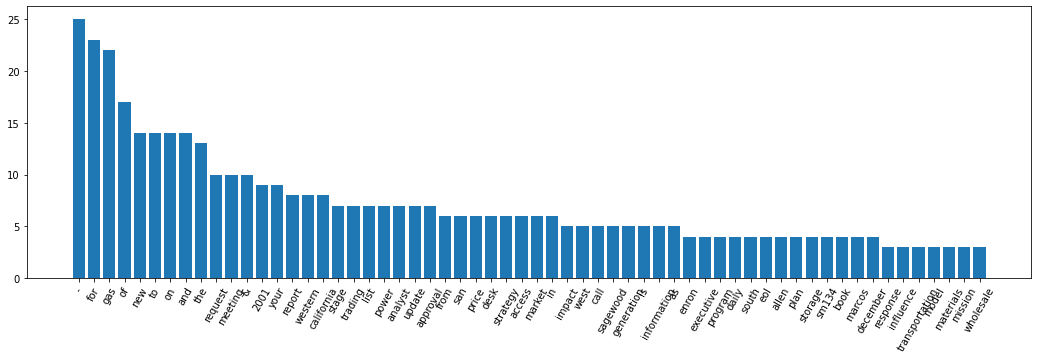

In [8]:
tokens = []
for c,s in clean_subjects_cnt:
    tokens.extend(s.lower().split())

cntr = Counter(tokens).most_common()
# print(cntr)

s = 60 # top N common tokens
tokens = [t for t,c in cntr[:s]]
counts = [c for t,c in cntr[:s]]

# Plot data
y = range(len(tokens))
plt.figure(figsize=(18,5))       # option to configure chrat size, this line should come first
plt.bar(y, counts)
plt.xticks(y,tokens, rotation=60)  # option to rotate bar names
plt.show()

### Exploration 4

### Try to figure out collocations

In [9]:
# Get dataset composed of subjects and email contents
subjects_dset = [s.lower().split() for c,s in clean_subjects_cnt]
content_dset = [c.lower().split() for c in df["content"].tolist()]

dataset = subjects_dset + content_dset

In [10]:
# Train bigram model
from gensim.models.phrases import Phrases
bigram_model = Phrases(dataset, min_count=3, threshold=10)    # dataset is iterable of iterable of str

In [11]:
# Construct bigram for subjects
subjects_bigram = []
for ix, e in enumerate(subjects_dset):
    subjects_bigram.append(bigram_model[e])

In [12]:
# Spot check the results
subjects_bigram[:20]

[['request_from', 'steve_kean'],
 ['new', 'notice', 'from', 'transwestern_pipeline', 'co.'],
 ['the', 'stage'],
 ['resume'],
 ['westgate_proforma-phillip', 'allen.xls'],
 ["this_morning's", 'commission_meeting', 'delayed'],
 ['maps'],
 ['w_basis', 'quotes'],
 ['presentation', 'to', 'trading_track', 'a&a'],
 ['sanjuan/socal', 'spread', 'prices'],
 ['buyout'],
 ['investment_structure'],
 ['(no', 'subject)'],
 ['instructions', 'for', 'ferc_meetings'],
 ['enron_response', 'to', 'san_diego', 'request_for', 'gas_price', 'caps'],
 ['consolidated', 'positioissues', '&', 'to', 'do_list'],
 ['san_juan', 'index'],
 ['receipt_of',
  'team_selection',
  'form_-',
  'executive_impact',
  '&_influence',
  'program'],
 ['receipts'],
 ['daily_report']]

In [13]:
# Construct bigram for contents
contents_bigram = []
for ix, e in enumerate(content_dset):
    contents_bigram.append(bigram_model[e])

In [14]:
# Spot check the results
contents_bigram[:20]

[['here_is', 'our', 'forecast'],
 ['traveling',
  'to',
  'have',
  'a',
  'business_meeting',
  'takes',
  'the',
  'fun',
  'out_of',
  'the',
  'trip.',
  'especially',
  'if_you',
  'have',
  'to',
  'prepare',
  'a',
  'presentation.',
  'i',
  'would_suggest',
  'holding',
  'the',
  'business',
  'plan',
  'meetings_here',
  'then',
  'take',
  'a_trip',
  'without_any',
  'formal',
  'business',
  'meetings.',
  'i',
  'would',
  'even',
  'try_and',
  'get',
  'some',
  'honest',
  'opinions',
  'on',
  'whether',
  'a_trip',
  'is',
  'even',
  'desired',
  'or',
  'necessary.',
  'as_far',
  'as',
  'the',
  'business',
  'meetings,',
  'i_think',
  'it',
  'would_be',
  'more',
  'productive',
  'to',
  'try_and',
  'stimulate',
  'discussions',
  'across',
  'the',
  'different',
  'groups',
  'about_what',
  'is',
  'working',
  'and',
  'what',
  'is',
  'not.',
  'too',
  'often',
  'the',
  'presenter',
  'speaks',
  'and',
  'the',
  'others',
  'are',
  'quiet',
  'j

### Create wordclouds to spotcheck frequent words in subjects

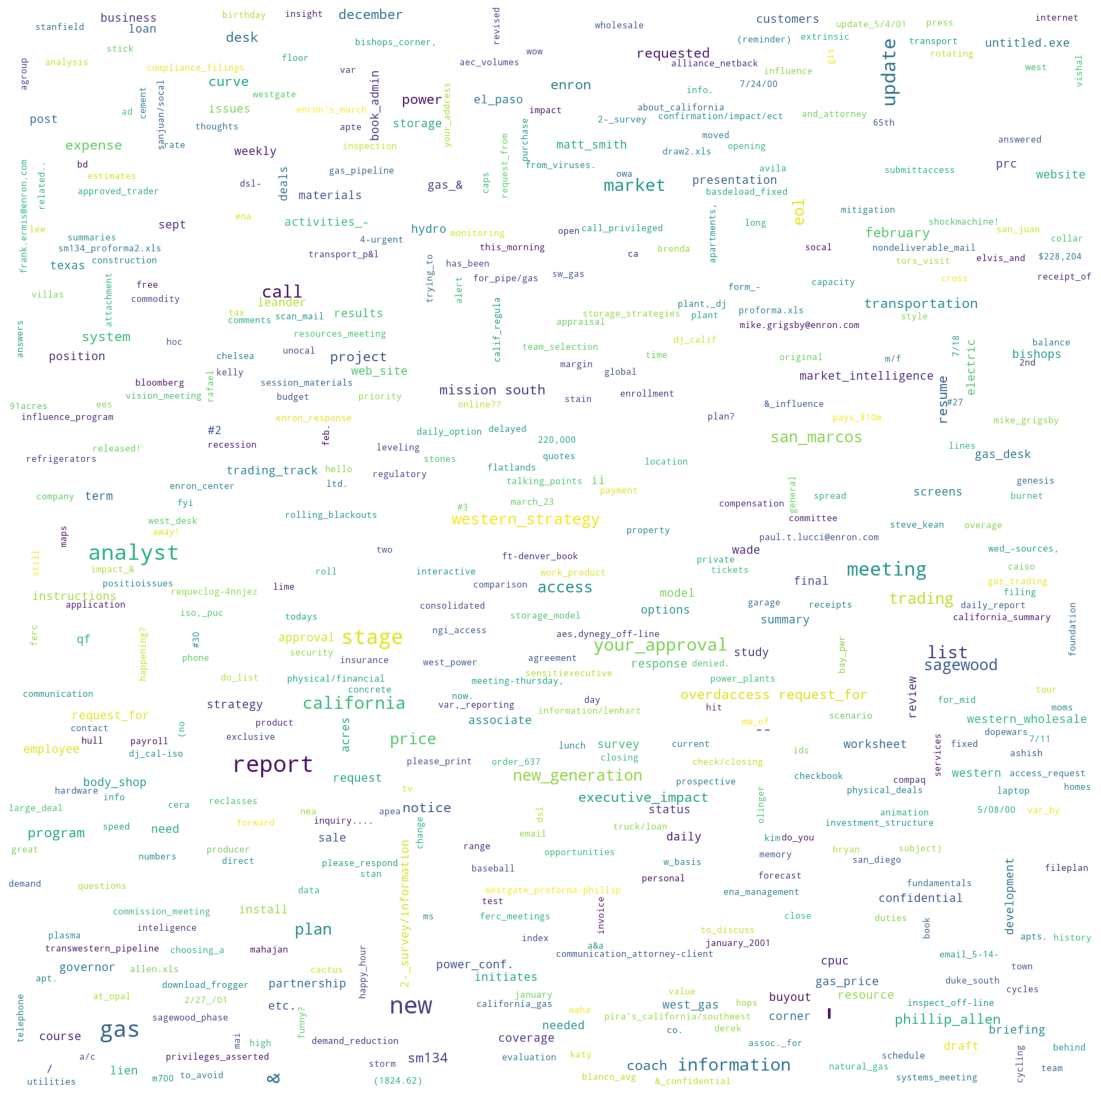

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

subjects_wc = " ".join(" ".join(s) for s in subjects_bigram)

wordcloud = WordCloud(max_font_size=60, max_words=500,
                      width = 2000, height = 2000, 
                      background_color="white", 
                      collocations=True,
                      random_state=2, 
                      stopwords = STOPWORDS,
                      regexp="[^\s]+").generate(subjects_wc)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Create wordclouds to spotcheck frequent words in dirty unprocessed contents

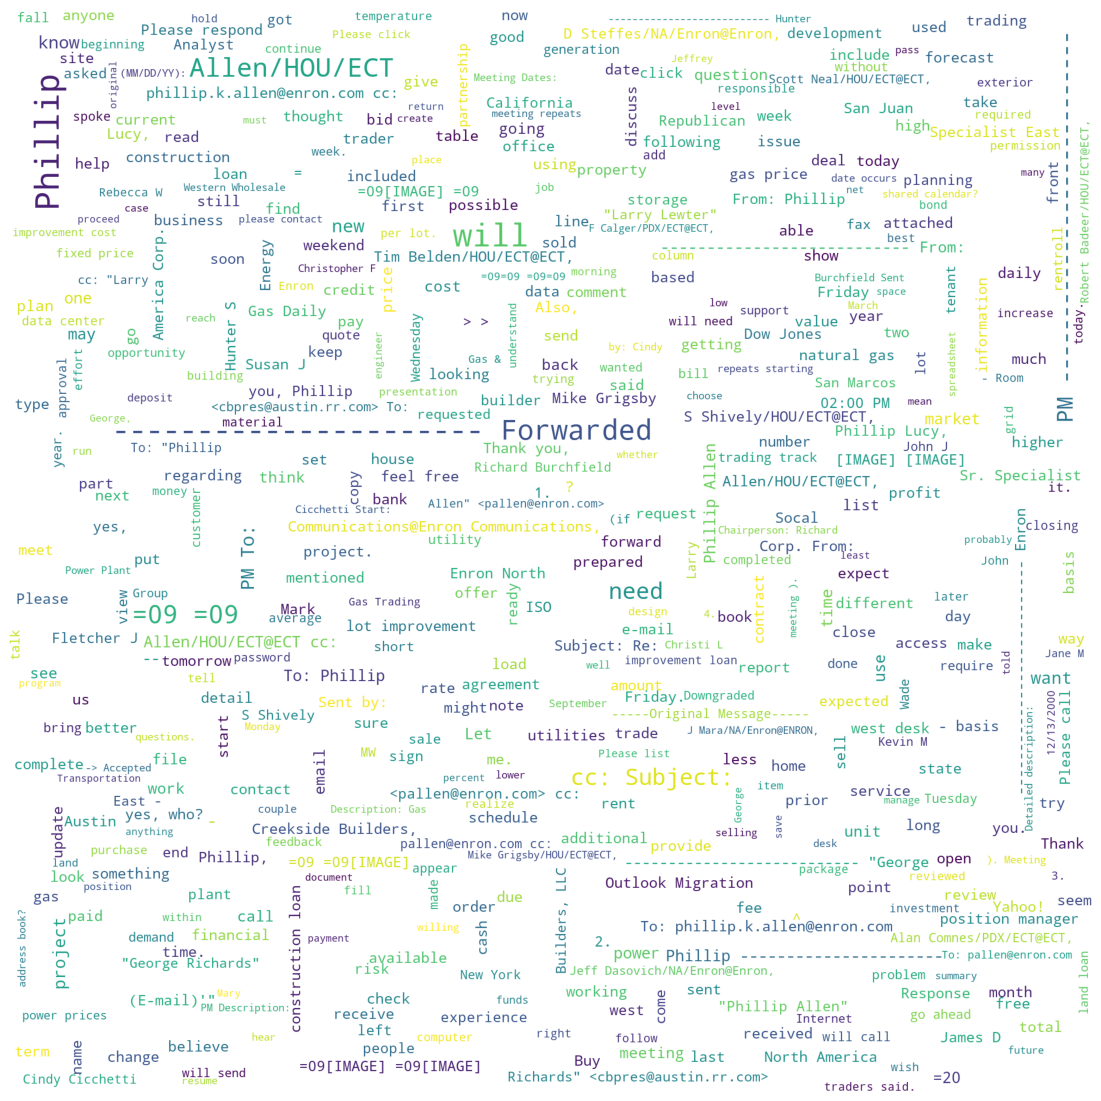

In [16]:
dirty_content = " ".join(c for c in df.content)

wordcloud = WordCloud(max_font_size=60, max_words=500,
                      width = 2000, height = 2000, 
                      background_color="white", 
                      collocations=True,
                      random_state=2, 
                      stopwords = STOPWORDS,
                      regexp="[^\s]+").generate(dirty_content)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Create wordclouds to spotcheck frequent words in bigrammed contents

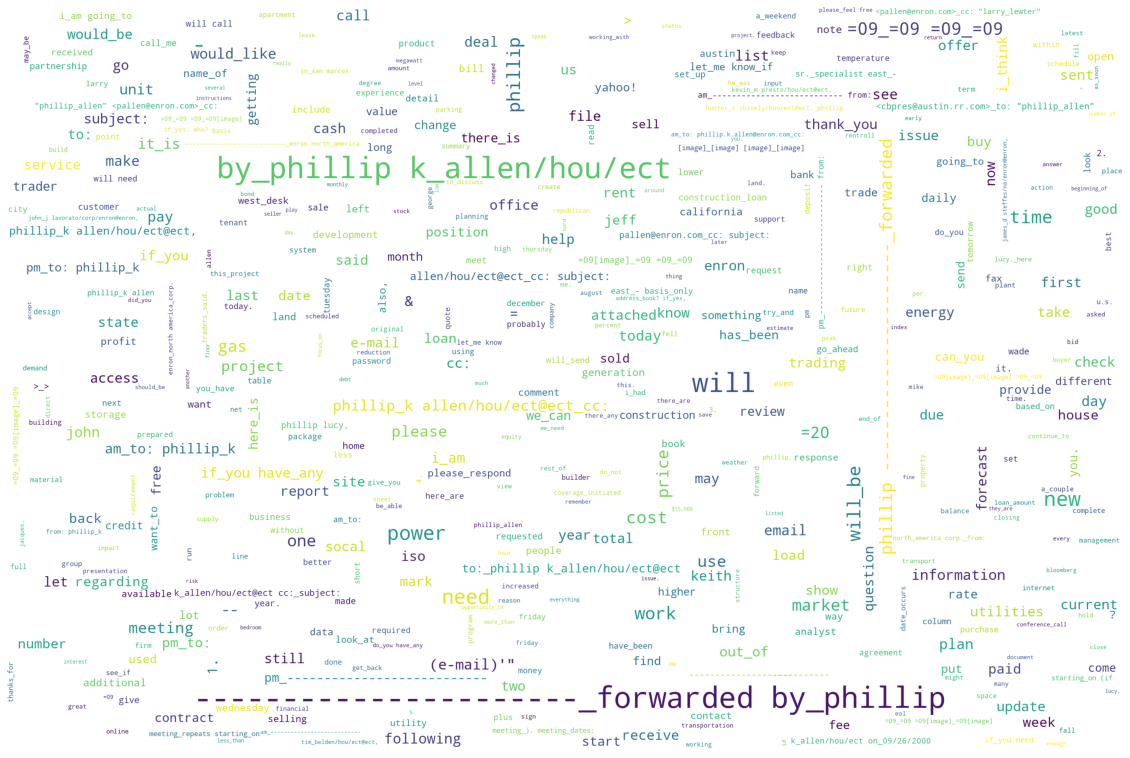

In [17]:
contents_wc = " ".join(" ".join(c) for c in contents_bigram)

wordcloud = WordCloud(max_font_size=80, max_words=500,
                      width = 3000, height = 2000, 
                      background_color="white", 
                      collocations=True,
                      random_state=2, 
                      stopwords = STOPWORDS,
                      regexp="[^\s]+").generate(contents_wc)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()